# Problem Definition

**Objective:**

We want to see the distribution male and females with heart disease.

We want to see the distribution of people with heart disease with respect to their age.

To understand the factors that cause heart disease and which features are significant in prediction 
if a patient has heart disease or not.

# **Dataset**

This database contains 14 attributes, The **"target"** column is our dependent variable


1. **age**: age in years

2. **sex**: sex (1 = male; 0 = female)

3. **cp**: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic

4. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital) trestbps

5. **chol**: serum cholestoral in mg/dl

6. **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. **restecg**: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. **thalach**: maximum heart rate achieved

9. **exang**: exercise induced angina (1 = yes; 0 = no)

10. **oldpeak**: ST depression induced by exercise relative to rest

11. **slope**: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping

12. **ca**: number of major vessels (0-3) colored by flourosopyca

13. **thal**: 3 = normal; 6 = fixed defect

14. **target** - diagnosis of heart disease (angiographic disease status) -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing (in any major vessel: attributes



**Importing the relevant libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



from pylab import rcParams
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8



# **Reading the data**

In [2]:
#Loading the data
data=pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Sturcture of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


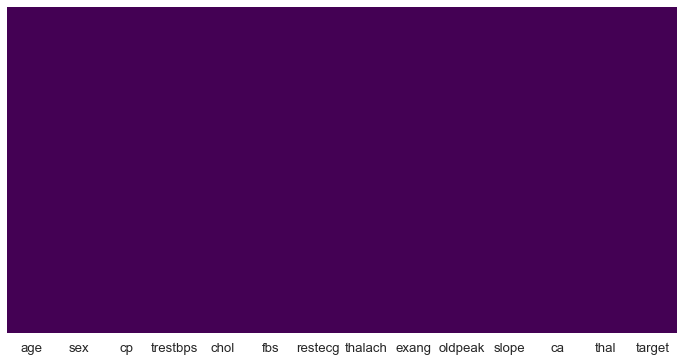

In [6]:
'''This step includes removing columns we do not need,
check missing values, aggregate sales by date and so on.
creating a heatmap to look for missing data'''
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='viridis');


# Exploratory Data Analysis

In [7]:
corrmat=data.corr()

In [8]:
top_corr_features=corrmat.index

<AxesSubplot:>

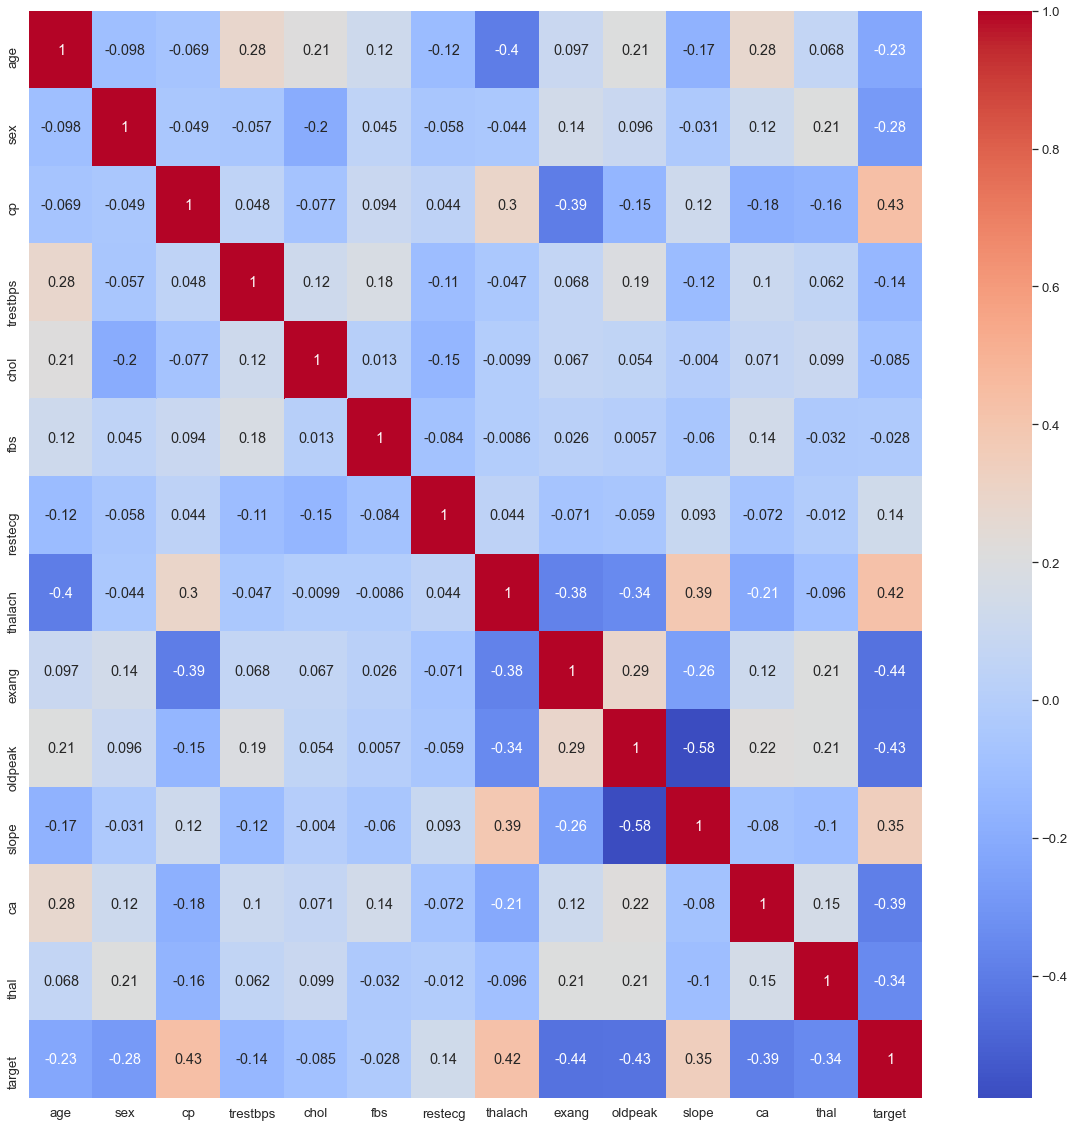

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='coolwarm')

In [10]:
def show_correlations(data, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = data.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

#correlation_data = show_correlations(data,show_chart=True)

In [11]:
show_correlations(data, show_chart=False)["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

<Figure size 1440x720 with 0 Axes>

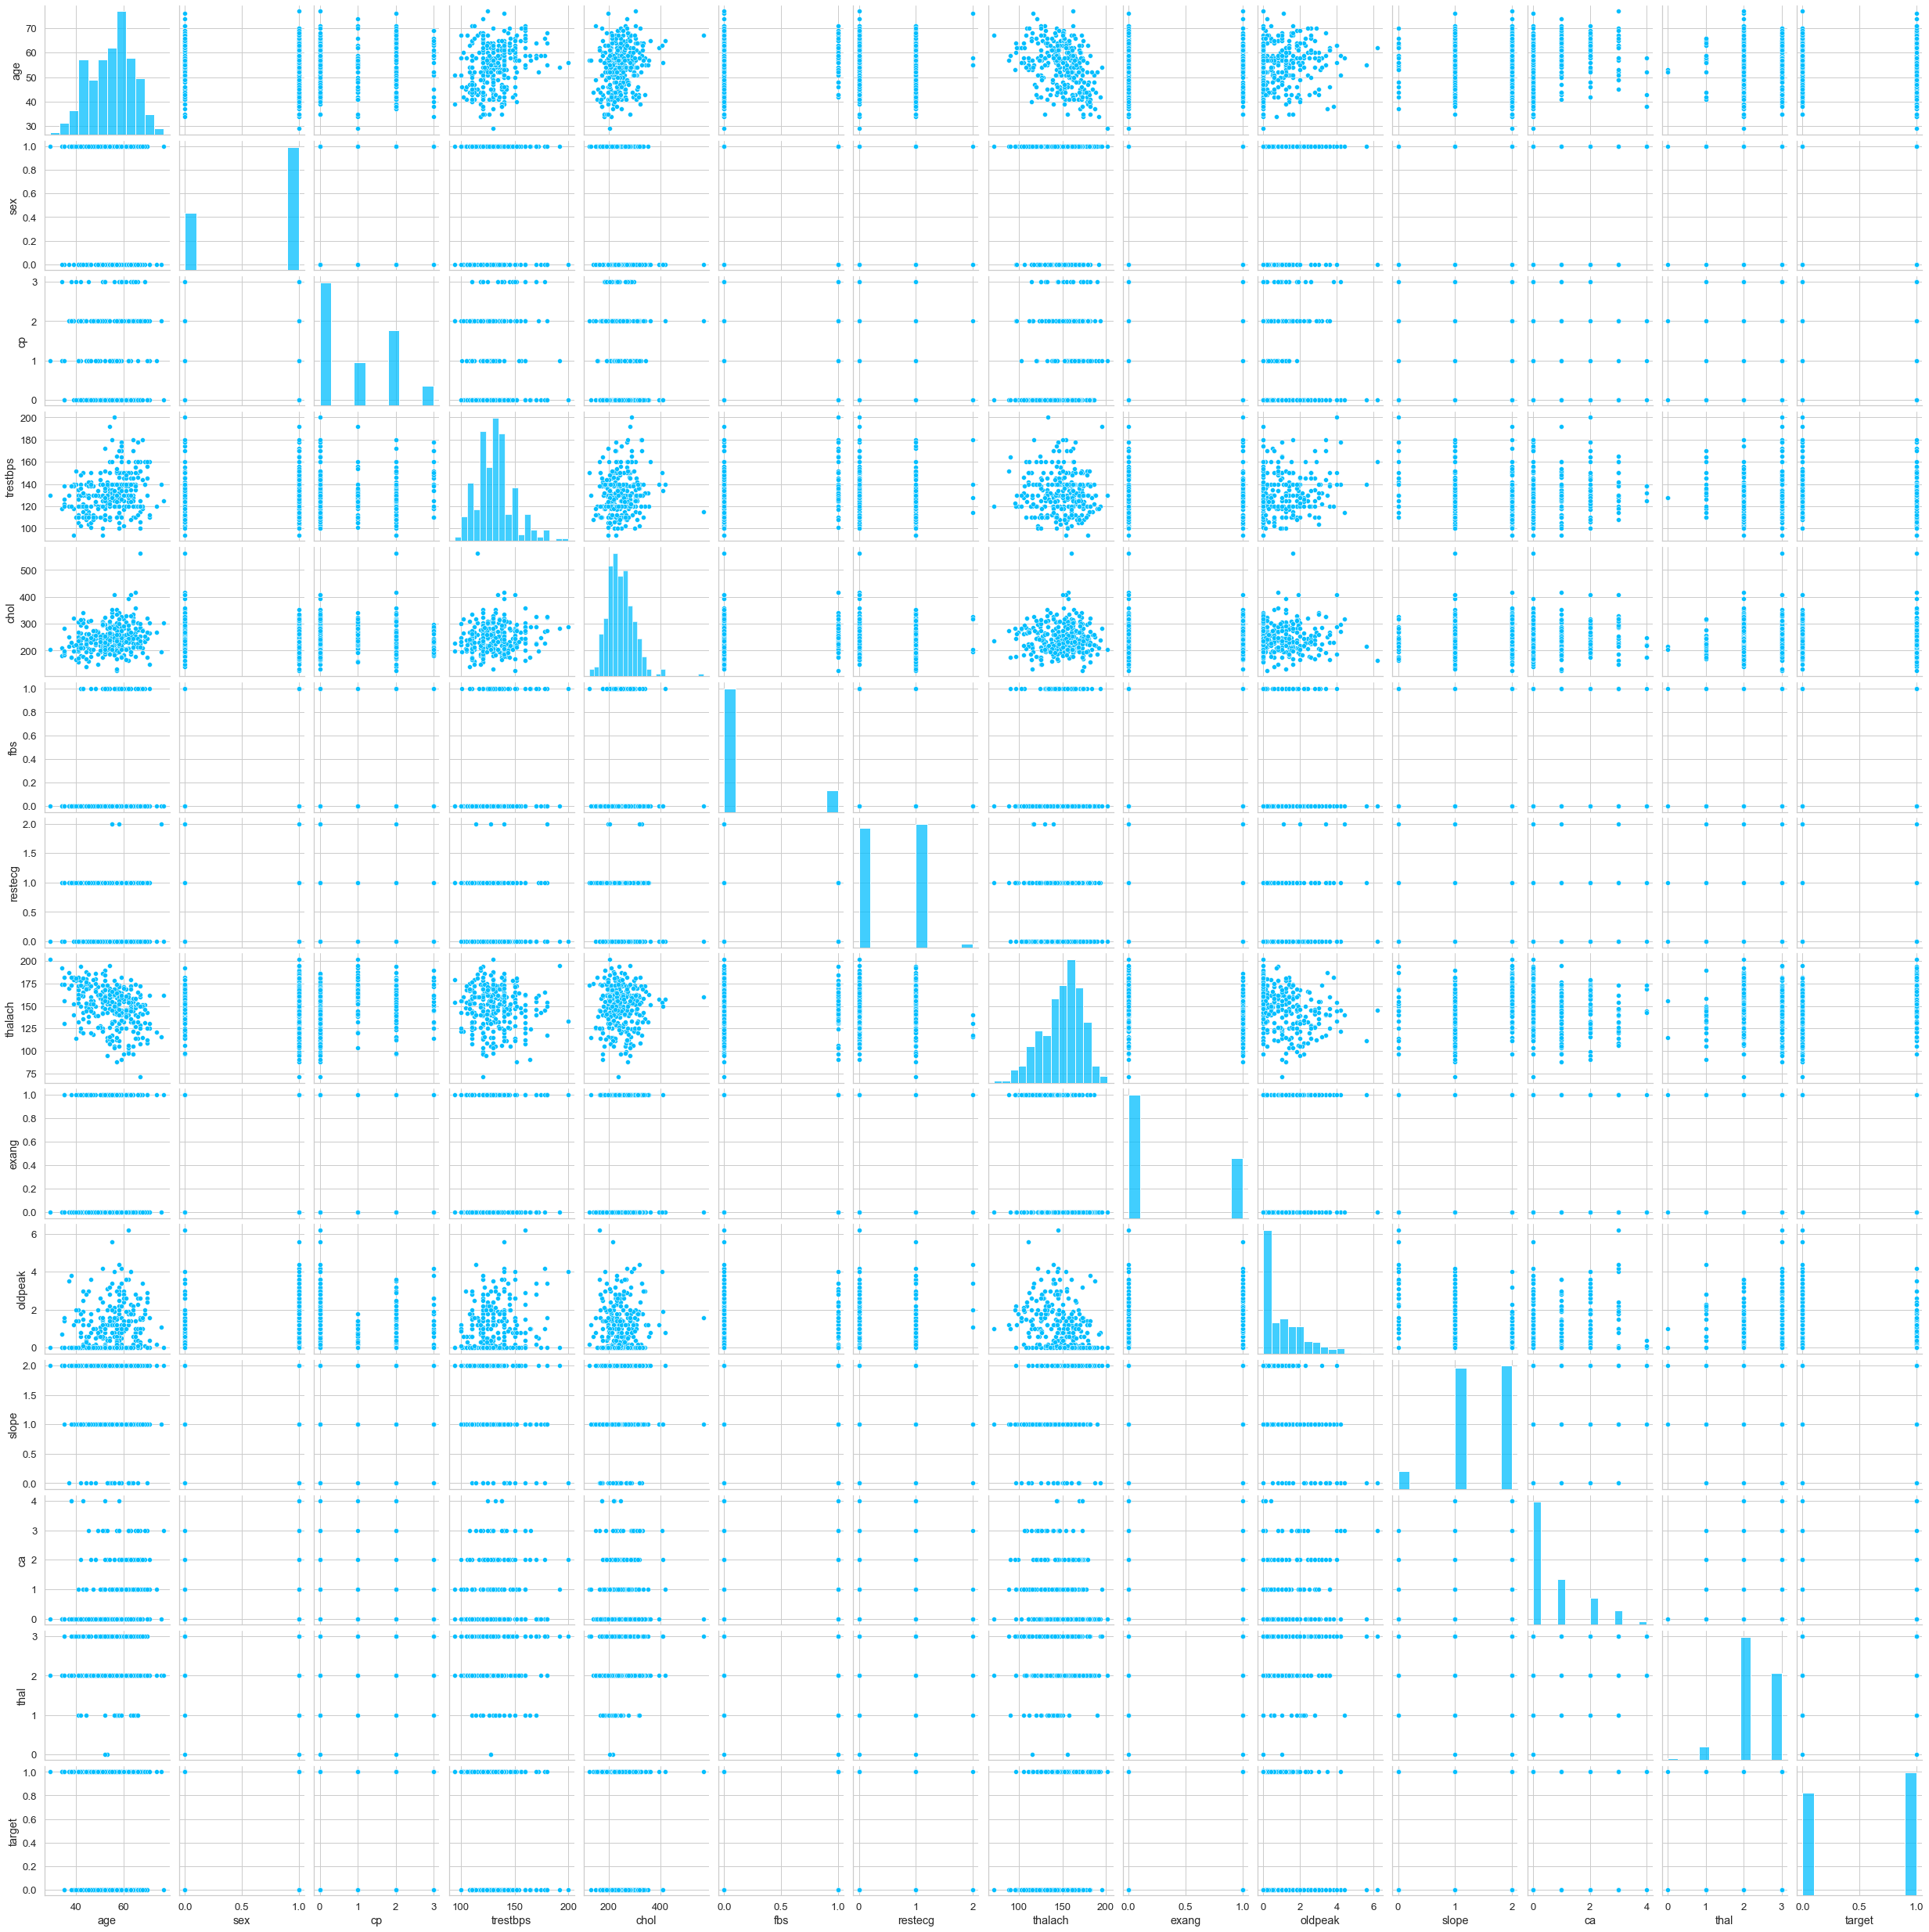

In [12]:
sns.pairplot(data);

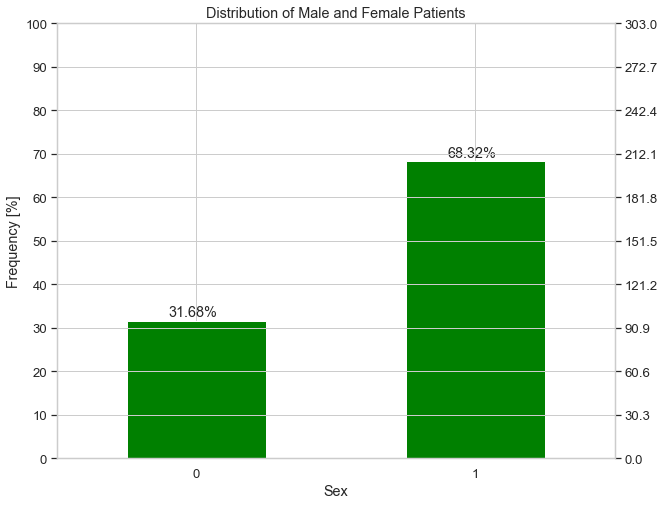

In [13]:
#showing the frequency distirbution of the values within the Sex variable(% of males and % of female patients)
plt.figure(figsize=(10,8))
plt.title('Distribution of Male and Female Patients')
plt.xlabel('Sex')
plt.ylabel('Frequency [%]')
ax = (data.sex.value_counts()/len(data)*100).sort_index().plot(kind="bar", rot=0,color='green')
ax.set_yticks(np.arange(0, 110, 10))
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(data)/100)
for p in ax.patches:
 ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

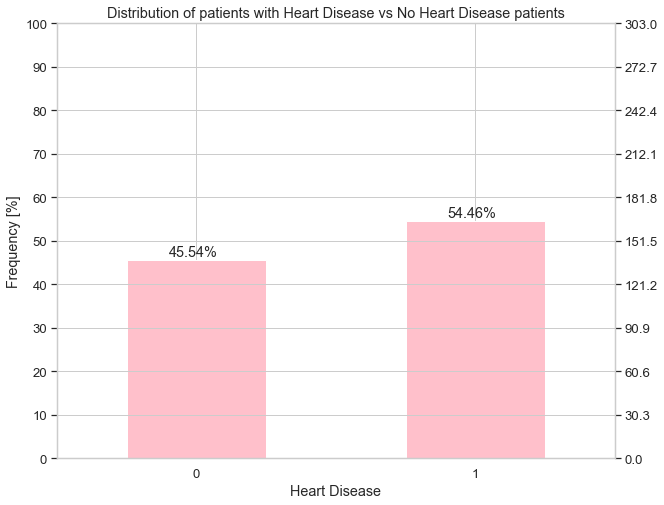

In [14]:
#showing the frequency distirbution of the values within the target variable('heart disease' vs 'no heart disease')
plt.figure(figsize=(10,8))
plt.title('Distribution of patients with Heart Disease vs No Heart Disease patients')
plt.xlabel('Heart Disease')
plt.ylabel('Frequency [%]')
ax = (data.target.value_counts()/len(data)*100).sort_index().plot(kind="bar", rot=0,color='pink')
ax.set_yticks(np.arange(0, 110, 10))
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(data)/100)
for p in ax.patches:
 ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

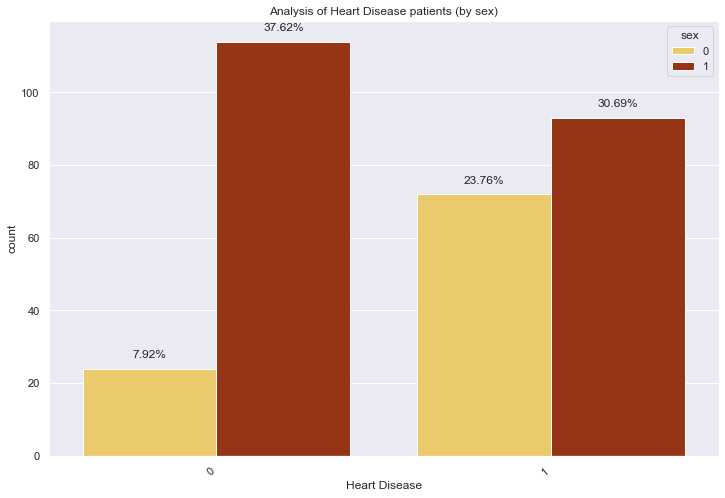

In [15]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
total = float(len(data)/100)
ax = sns.countplot(x="target", hue="sex", data=data,palette='afmhot_r') # for Seaborn version 0.7 and more
for p in ax.patches:
 height = p.get_height()
 height =height
 ax.text(p.get_x()+p.get_width()/2.,
 height + 3,
 '{:0.2f}%'.format(height/total),
 ha="center")
plt.title('Analysis of Heart Disease patients (by sex)')
plt.xlabel('Heart Disease')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40,ha="right")
plt.tight_layout;

**Observation:** 54% of the sample had heart disease whilst 46% did not.

In [16]:
# Examine the target class distribution-using our original data t
#what percentage had heart disease vs number that did not
data.target.value_counts().sort_index()


0    138
1    165
Name: target, dtype: int64

In [17]:
#Representing the % Heart Disease and No Heart Disease in a pie chart
p=data['target']==0 #we are storing those who do not have heart disease in the container/variable p
q=data['target']==1  #we are storing those who have heart disease in the container/variable q


In [18]:
#we want the total of all the values that we have stored in the variables/containers q and p respectively
q=q.sum()
p=p.sum()


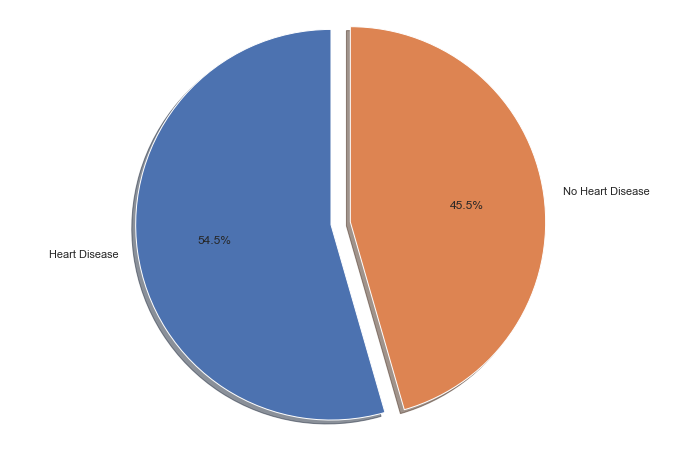

In [19]:
# Data to plot
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Heart Disease', 'No Heart Disease'
sizes = [q, p]
explode = (0, 0.1) # only "explode" the 2nd slice (i.e. 'Yes')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
 shadow=True, startangle=90)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [20]:
count_no_reccurence = len(data[data['target']==0])
count_reccurence = len(data[data['target']==1])
pct_of_no_reccurence = count_no_reccurence/(count_no_reccurence+count_reccurence)
print("percentage of no recurrence is", pct_of_no_reccurence*100)
pct_of_reccurence = count_reccurence/(count_no_reccurence+count_reccurence)
print("percentage of recurrent", pct_of_reccurence*100)

percentage of no recurrence is 45.54455445544555
percentage of recurrent 54.45544554455446


The above pie chart indicates that the class values of the target variable are almost the same

In [21]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [22]:
for item in data.columns:
    print(item)
    print (data[item].unique())

age
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex
[1 0]
cp
[3 2 1 0]
trestbps
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs
[1 0]
reste

Univeariate Analysis of the Numerical Features -with Histograms


<AxesSubplot:title={'center':'The number of ST depression induced by exercise'}, ylabel='Frequency'>

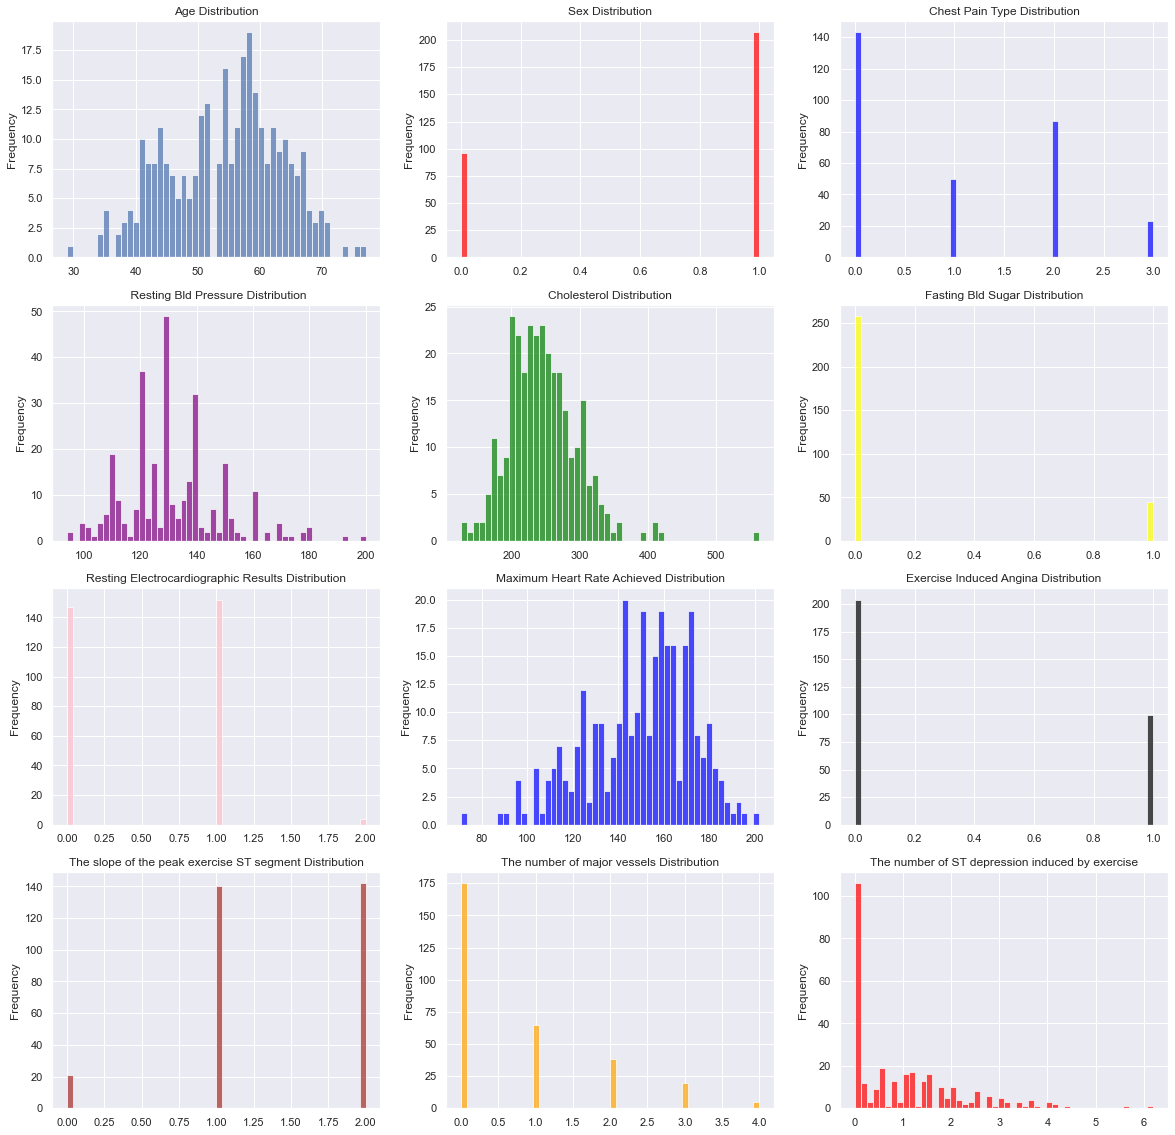

In [23]:
print('Univeariate Analysis of the Numerical Features -with Histograms')
f,axes=plt.subplots(4,3, figsize=(20,20))
#Producing the Histograms:-
data['age'].plot.hist(alpha=0.7,bins=50,title="Age Distribution",ax=axes[0,0])
data['sex'].plot.hist(color='red', alpha=0.7,bins=50,title="Sex Distribution",ax=axes[0,1])
data['cp'].plot.hist(color='blue', alpha=0.7,bins=50,title="Chest Pain Type Distribution",ax=axes[0,2])
data['trestbps'].plot.hist(color='purple', alpha=0.7,bins=50,title=" Resting Bld Pressure Distribution",ax=axes[1,0])
data['chol'].plot.hist(color='green', alpha=0.7,bins=50,title="Cholesterol Distribution",ax=axes[1,1])
data['fbs'].plot.hist(color='yellow', alpha=0.7,bins=50,title="Fasting Bld Sugar Distribution",ax=axes[1,2])
data['restecg'].plot.hist(color='pink', alpha=0.7,bins=50,title="Resting Electrocardiographic Results Distribution",ax=axes[2,0])
data['thalach'].plot.hist(color='blue', alpha=0.7,bins=50,title="Maximum Heart Rate Achieved Distribution",ax=axes[2,1])
data['exang'].plot.hist(color='black', alpha=0.7,bins=50,title="Exercise Induced Angina Distribution",ax=axes[2,2])
data['slope'].plot.hist(color='brown', alpha=0.7,bins=50,title="The slope of the peak exercise ST segment Distribution",ax=axes[3,0])
data['ca'].plot.hist(color='orange', alpha=0.7,bins=50,title="The number of major vessels Distribution",ax=axes[3,1])
data['oldpeak'].plot.hist(color='red', alpha=0.7,bins=50,title="The number of ST depression induced by exercise",ax=axes[3,2])


#Plotting debsity plots
#sns.distplot(data['age'], kde=True, rug=False,color='skyblue',ax=axes[1,0])
#sns.distplot(data['sex'], kde=True, rug=False,color='green',ax=axes[1,1])
#sns.distplot(data['cp'], kde=True, rug=False,color='gold',ax=axes[1,2])
#sns.distplot(data['trestbps'], kde=True, rug=False,color='gold',ax=axes[1,3])

In [24]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [25]:
X=data.iloc[:,0:13]
y=data.iloc[:,13]


In [26]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

**Feature Importance**

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [29]:
print(model.feature_importances_)

[0.05859133 0.03612728 0.19306098 0.04723511 0.04883857 0.0156301
 0.03994584 0.06306141 0.09670431 0.06720006 0.0578614  0.14332285
 0.13242076]


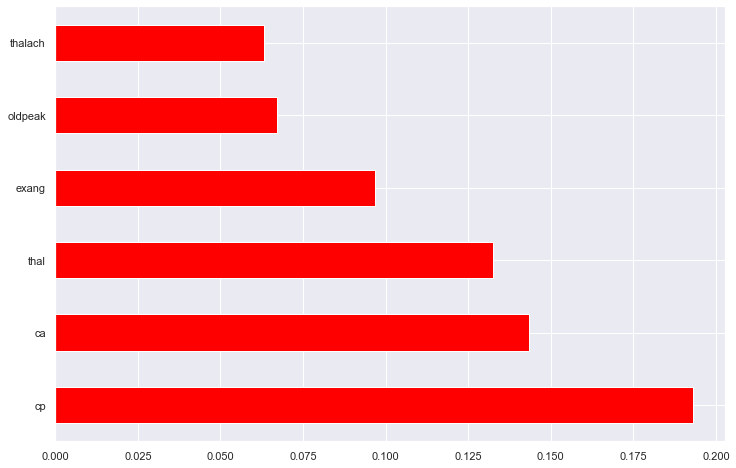

In [30]:
feature_importances=pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(6).plot(kind='barh', color='red')
plt.show()


**Observations:-Order of Importance**

1. cp: chest pain type 
    
2. ca: number of major vessels (0-3) colored by flourosopyca
    
3. thal:thalassemia 

4. exang: exercise induced angina

5. oldpeak: ST depression induced by exercise relative to rest

6. slope: the slope of the peak exercise ST segment

# Training our model

In [31]:
#Splitting our dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [32]:
#Importing the Linear Regression model from the sklearn library
from sklearn.linear_model import LogisticRegression

In [33]:
#Initialising our logistic regression model
logisticRegr = LogisticRegression()

In [34]:
#Fitting our logistic regression model to our train data
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [35]:
#Make predictions on entire test data
y_predictions = logisticRegr.predict(X_test)

In [36]:
#Calculating the accuracy

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.88


In [37]:
#There are two rpeort that are used to evaluate the model. One is the classifaction report
#and the other is the confusion matrix.
#We also yse the accuracy score to determine how accurate our model is
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


In [38]:
#we want to display the classification report
print(classification_report(y_test,y_predictions))


              precision    recall  f1-score   support

           0       0.95      0.80      0.86        44
           1       0.83      0.96      0.89        47

    accuracy                           0.88        91
   macro avg       0.89      0.88      0.88        91
weighted avg       0.89      0.88      0.88        91



**Evaluation Metrics:**

**Precision:**

is a ratio of the number of true positives divided by the sum of the true positives and false positives.

It describes how good a model is at predicting the positive class.

Precision = True Positives / (True Positives + False Positives)


**Recall:**
Recall= (True Positives) / (All Actual Positives)

Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives
and the false negatives.

Recall is the same as sensitivity.
Recall = True Positives / (True Positives + False Negatives)


Sensitivity = True Positives / (True Positives + False Negatives)
Recall = Sensitivity

In [39]:
#we want to display the confusion matrix
print(confusion_matrix (y_test,y_predictions))
#caclualting the accuracy of our model using the confusion matrix
#Accuracy=(35+45)/(35+2+9+45)=80/91=.88=88.0%
#Can we say that
#Accuracy=(TN+TP)/(TN+FN+FP+TP)


[[35  9]
 [ 2 45]]


In [40]:
from sklearn.metrics import confusion_matrix
import pandas as pd
confusion_df = pd.DataFrame(confusion_matrix(y_test,y_predictions),
 columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
 index = ["Class " + str(class_name) for class_name in [0,1]])
print(confusion_df)


         Predicted Class 0  Predicted Class 1
Class 0                 35                  9
Class 1                  2                 45


In [41]:
#this is to measure the acccuracy of the model using accuracy_score() and we put our result in
#a variable/container called acc_LogisticRegression
acc_LogisticRegression = accuracy_score(y_test, y_predictions)
#On the second line we deicide to multiply the result in line 1 by 100 and round it to 2 decimal places
#and the result is stored in the same vaiable acc_LogisticRegression
acc_LogisticRegression=round(acc_LogisticRegression*100,2)
acc_LogisticRegression


87.91

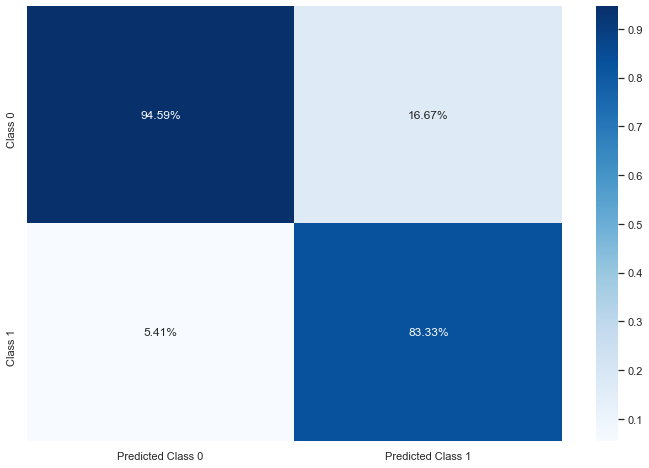

In [42]:
#We wanted to see the values in percentage
sns.heatmap(confusion_df/np.sum(confusion_df), annot=True,
 fmt='.2%', cmap='Blues');

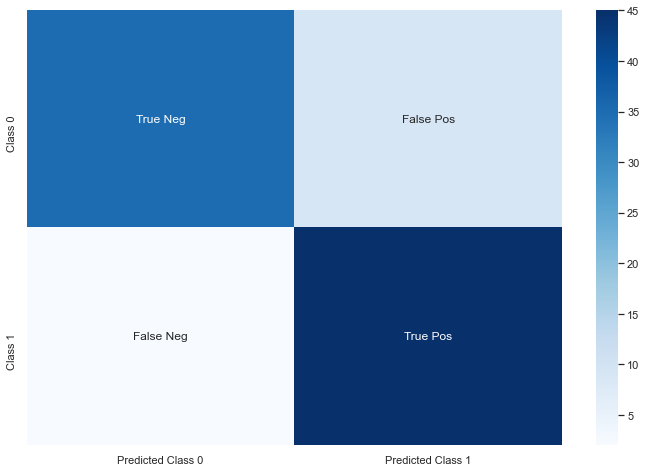

In [43]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_df, annot=labels, fmt='', cmap='Blues');


In [44]:
score=logisticRegr.score(X_test,y_test)
score=score*100

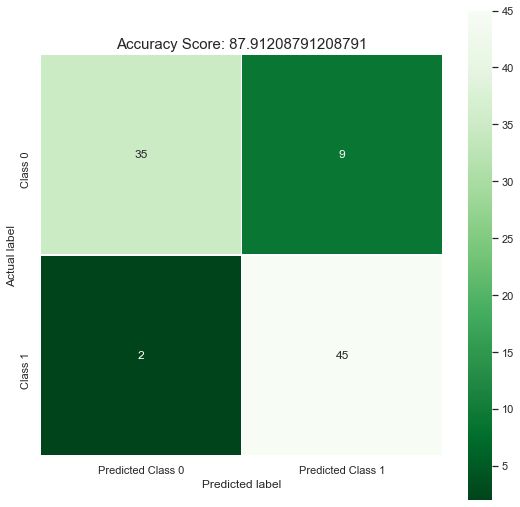

In [45]:
#Representing the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_df, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15);

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.935


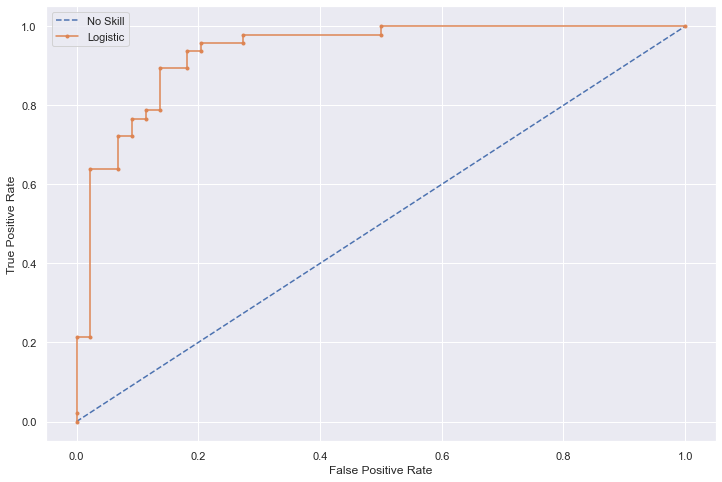

In [46]:
# roc curve and auc
#from sklearn.datasets import make_classification
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from matplotlib import pyplot
# generate 2 class dataset
##X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
#model = LogisticRegression(solver='lbfgs')
logisticRegr.fit(X_train, y_train)
# predict probabilities
lr_probs = logisticRegr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

In [47]:
df_pred=pd.DataFrame(y_predictions,columns=['Prediction'])

In [48]:
y_predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0], dtype=int64)

<AxesSubplot:xlabel='target', ylabel='Density'>

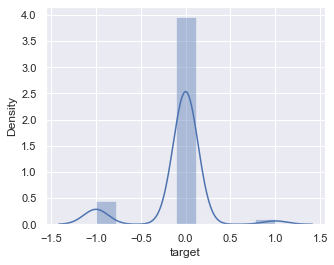

In [49]:
plt.figure(figsize=(5,4))
sns.distplot(y_test-y_predictions)

In [50]:
# Predicted probabilities from test features
y_predicted_proba = logisticRegr.predict_proba(X_test)

In [51]:
y_predicted_proba

array([[0.99558475, 0.00441525],
       [0.14934672, 0.85065328],
       [0.44160272, 0.55839728],
       [0.04345748, 0.95654252],
       [0.9753527 , 0.0246473 ],
       [0.13200408, 0.86799592],
       [0.10271438, 0.89728562],
       [0.98594498, 0.01405502],
       [0.94392043, 0.05607957],
       [0.2173313 , 0.7826687 ],
       [0.96628112, 0.03371888],
       [0.21165934, 0.78834066],
       [0.92924037, 0.07075963],
       [0.45577525, 0.54422475],
       [0.09018233, 0.90981767],
       [0.20570069, 0.79429931],
       [0.01561846, 0.98438154],
       [0.21567641, 0.78432359],
       [0.17915405, 0.82084595],
       [0.98552865, 0.01447135],
       [0.98731547, 0.01268453],
       [0.4519087 , 0.5480913 ],
       [0.34422759, 0.65577241],
       [0.24439066, 0.75560934],
       [0.67662964, 0.32337036],
       [0.06072335, 0.93927665],
       [0.9723117 , 0.0276883 ],
       [0.27641078, 0.72358922],
       [0.97596479, 0.02403521],
       [0.90343403, 0.09656597],
       [0.

In [52]:
df_test = pd.DataFrame(X_test)
df_test['y_test'] = y_test
df_test['Predicted ys'] = y_predictions
df_test['prob_0'] = y_predicted_proba[:,0]
df_test['prob_1'] = y_predicted_proba[:,1]
df_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,y_test,Predicted ys,prob_0,prob_1
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0,0,0.995585,0.004415
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,1,0.149347,0.850653
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,1,0.441603,0.558397
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1,1,0.043457,0.956543
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,0,0.975353,0.024647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0,0,0.856725,0.143275
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1,1,0.326613,0.673387
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0,0,0.819338,0.180662
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1,1,0.452358,0.547642


**Predicting whether or not a patient has a heart disease with entirely new data**

In [53]:
# define one new data instance
Xnew = [[70, 1,2,150,1,1,150,1,3.4,1,3,3,1]]
# make a prediction
ynew = logisticRegr.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[70, 1, 2, 150, 1, 1, 150, 1, 3.4, 1, 3, 3, 1], Predicted=1


**Extra checking of important features**

In [54]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.351932
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.489     
Dependent Variable: target           AIC:              239.2711  
Date:               2020-12-20 18:44 BIC:              287.5496  
No. Observations:   303              Log-Likelihood:   -106.64   
Df Model:           12               LL-Null:          -208.82   
Df Residuals:       290              LLR p-value:      4.0884e-37
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age            0.0128    0.0191   0.6701  0.5028  -0.0246   0.0501
sex           -1.6381    0.4519  -3.6250  0.0003  -2.5237  -0.

**How does Pickle work in Python?**
Python pickle module is used for serializing and de-serializing a Python object structure. 
Any object in Python can be pickled so that it can be saved on disk. 
What pickle does is that it “serializes” the object first before writing it to file. 
Pickling is a way to convert a python object (list, dict, etc.)

In [55]:

### Create a Pickle file using serialization 
import pickle
file = open("heart_ds_log_regr_model.pkl","wb")
pickle.dump(logisticRegr, file)
file.close()
